In [1]:
import QBOOST as qb
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import math
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('train.csv')
data

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [3]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [4]:
y = data['target']
x = data.drop(['target', 'ID_code'], axis=1)

In [5]:
# Distribution of the target variable with percentage
y.value_counts(normalize=True)

target
0    0.89951
1    0.10049
Name: proportion, dtype: float64

In [6]:
# Balancing the dataset
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x, y)

# Distribution of the target variable with percentage
y_res.value_counts(normalize=True)

target
0    0.5
1    0.5
Name: proportion, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.8)

<Axes: >

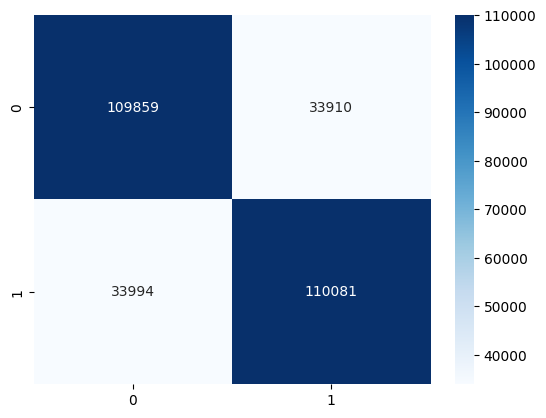

In [59]:
# Training a random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=300, max_depth=5, random_state=0)
rf.fit(x_train, y_train)

# Confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(x_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap = 'Blues')

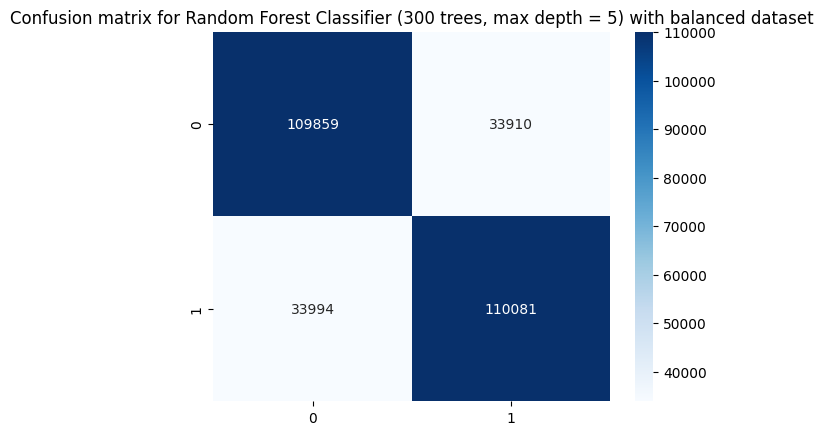

In [60]:
y_pred = rf.predict(x_test)
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap = 'Blues')
plt.title('Confusion matrix for Random Forest Classifier (300 trees, max depth = 5) with balanced dataset')
plt.savefig('Images/balanced_confusion_matrix_RF_300_maxdp5.png')

In [61]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7640944400439127

Average precision-recall score: 0.70


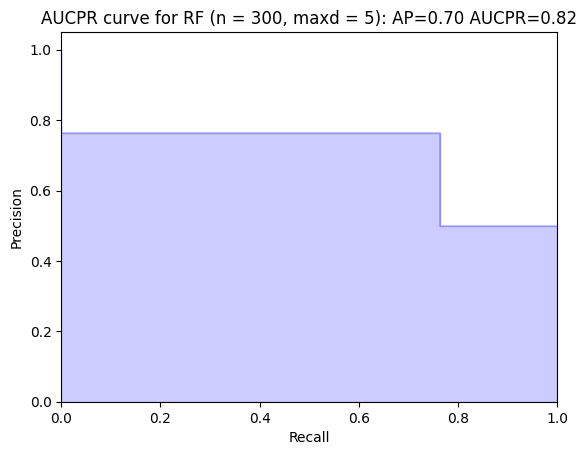

In [62]:
# Plotting AUCPR curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


from sklearn.metrics import precision_recall_curve
from funcsigs import signature


precision, recall, _ = precision_recall_curve(y_test, y_pred)
aucpr_score = auc(recall, precision)

step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')   
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('AUCPR curve for RF (n = 300, maxd = 5): AP={0:0.2f}'.format(average_precision) + ' ' + 'AUCPR={0:0.2f}'.format(aucpr_score))
plt.savefig('Images/balanced_AUCPR_RF_300_maxdp5.png')


In [63]:
# Training 60 decision trees
from sklearn.tree import DecisionTreeClassifier

L = []
for i in range(60):
    x_train_small, _, y_train_small, _ = train_test_split(x_train, y_train, test_size=0.7)
    dt = DecisionTreeClassifier(max_depth=5)
    dt.fit(x_train_small, y_train_small)
    L.append(dt)

In [64]:
w = qb.RGS(L,x_train,y_train,2)[0]
y_pred = qb.PredictRGS(L,w,x_test)

In [65]:
w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [66]:
qb.QUBO(L,x_train,y_train,2)

array([[-34082.01111111,  12704.        ,  29694.        , ...,
         22272.        ,   6452.        ,  26776.        ],
       [ 12704.        , -36258.01111111,  23778.        , ...,
         25868.        ,  18400.        ,  13388.        ],
       [ 29694.        ,  23778.        , -35374.01111111, ...,
         39626.        ,   7218.        ,  27918.        ],
       ...,
       [ 22272.        ,  25868.        ,  39626.        , ...,
        -32690.01111111,  10784.        ,  19668.        ],
       [  6452.        ,  18400.        ,   7218.        , ...,
         10784.        , -32034.01111111,   6632.        ],
       [ 26776.        ,  13388.        ,  27918.        , ...,
         19668.        ,   6632.        , -32850.01111111]])

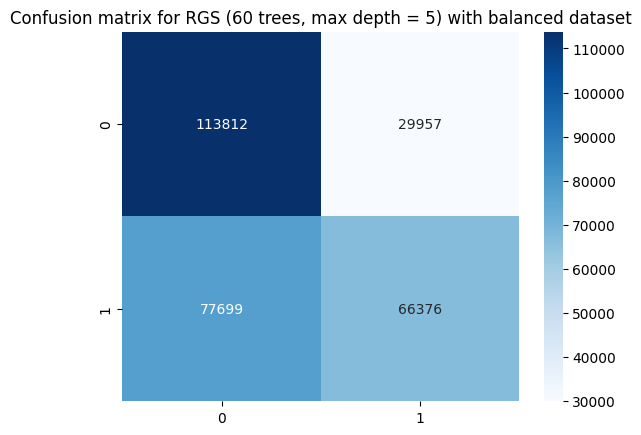

In [67]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion matrix for RGS (60 trees, max depth = 5) with balanced dataset')
plt.savefig('Images/balanced_confusion_matrix_RGS_60_maxdp5.png')

Average precision-recall score: 0.59


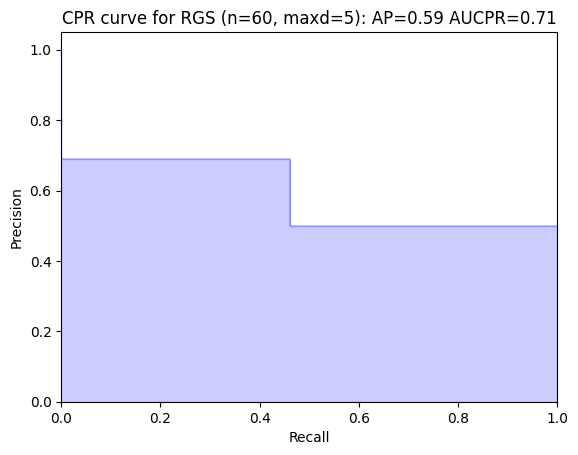

In [68]:
# Plotting CPR curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)
aucpr_score = auc(recall, precision)

step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')   
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('CPR curve for RGS (n=60, maxd=5): AP={0:0.2f}'.format(average_precision) + ' ' + 'AUCPR={0:0.2f}'.format(aucpr_score))
plt.savefig('Images/balanced_CPR_RGS_60_maxdp5.png')

In [69]:
# Checking the perf with w = 1

w = np.ones(60)
y_pred = qb.PredictRGS(L,w,x_test)

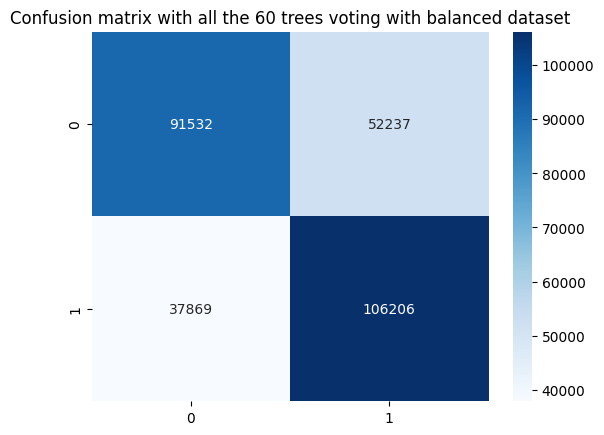

In [70]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title('Confusion matrix with all the 60 trees voting with balanced dataset')
plt.savefig('Images/balanced_cm_all_60_trees.png')

Average precision-recall score: 0.63


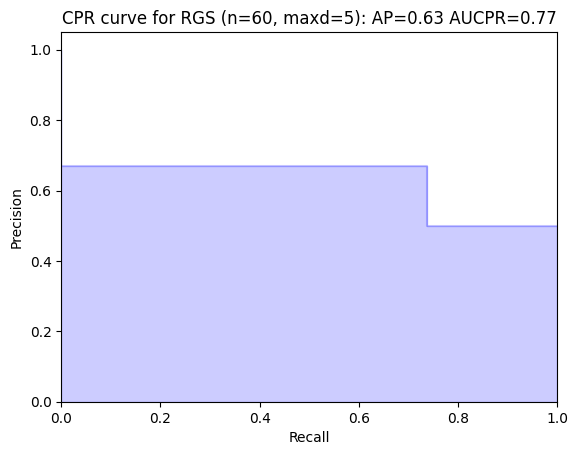

In [71]:
# Plotting AUCPR curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import auc
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))


from sklearn.metrics import precision_recall_curve
from funcsigs import signature

precision, recall, _ = precision_recall_curve(y_test, y_pred)
aucpr_score = auc(recall, precision)

step_kwargs = ({'step': 'post'}
                if 'step' in signature(plt.fill_between).parameters
                else {})
plt.step(recall, precision, color='b', alpha=0.2,
            where='post')   
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('CPR curve for RGS (n=60, maxd=5): AP={0:0.2f}'.format(average_precision) + ' ' + 'AUCPR={0:0.2f}'.format(aucpr_score))
plt.savefig('Images/balanced_CPR_RGS_60_maxdp5_withall.png')